In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from BondingCurveNexus.single_sim import single_sim
from BondingCurveNexus.multi_sim import multi_sim

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 365/365 [00:00<00:00, 533.99it/s]


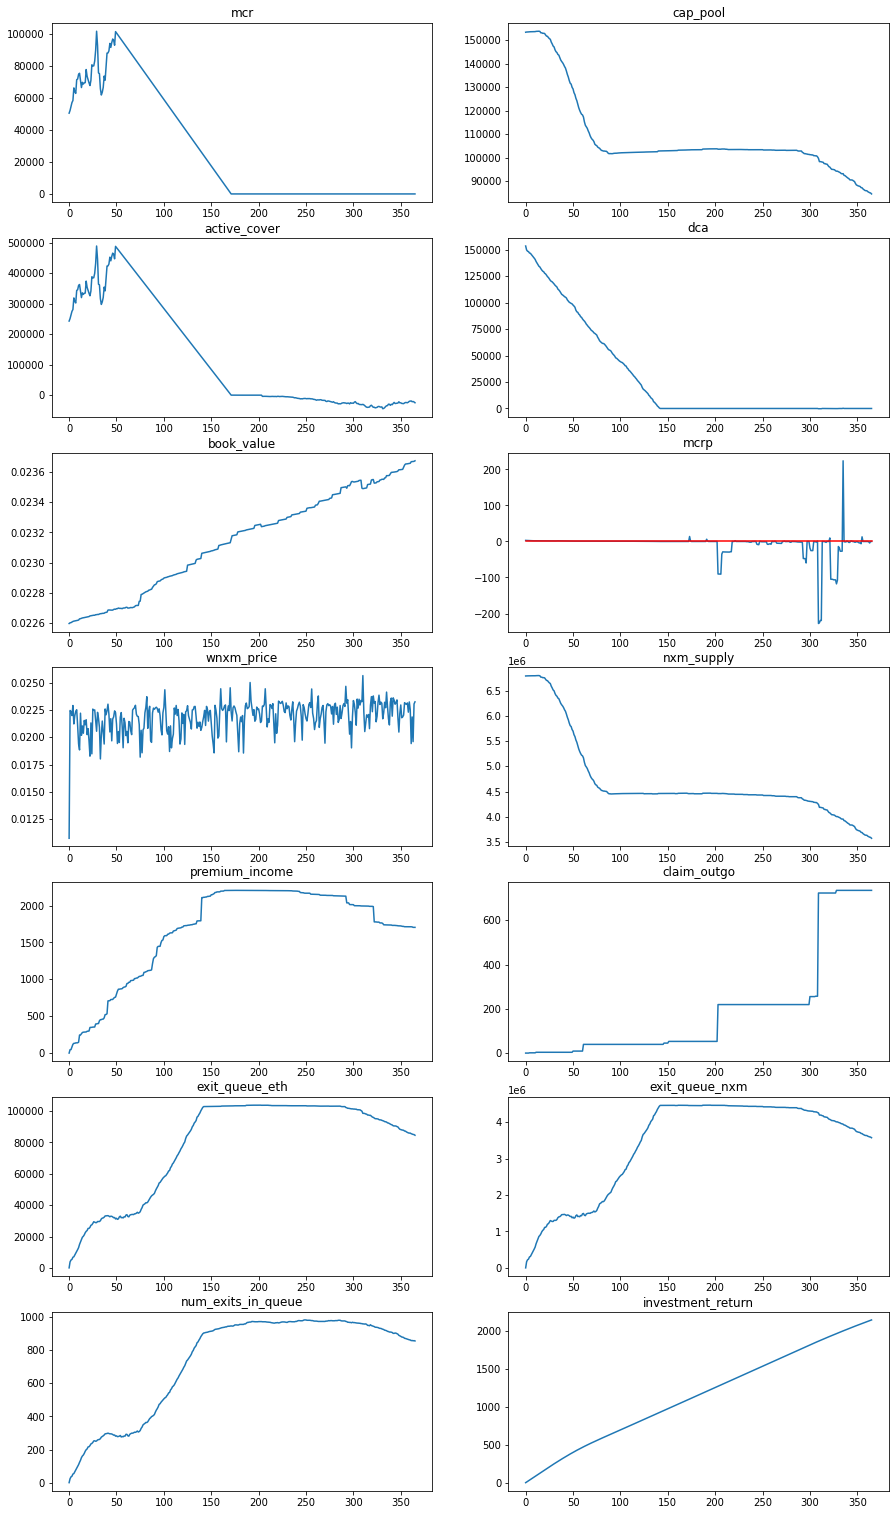

In [37]:
%run ../BondingCurveNexus/single_sim.py

In [19]:
sim.exit_array.shape

(244, 4)

In [29]:
min(sim.dca_prediction)

-681.773162546313

In [30]:
min(sim.cap_pool_prediction)

19342.662255639098

In [ ]:
from BondingCurveNexus.sys_class import NexusSystem

In [ ]:
sim = NexusSystem()

In [ ]:
for i in range(200):
    sim.one_day_passes()

In [ ]:
sim.exit_array.shape

In [ ]:
a

In [ ]:
sim.exit_array.shape

In [ ]:
sim.one_day_passes()

In [ ]:
sim.exit_array.shape

In [ ]:
sim.exit_array[:, -1]

In [ ]:
sim.mcr()

In [ ]:
a = np.array([7,8,9,5,2,1,5,6,1])

print(np.where(a>7.5)[0][0])